# San Francisco Police Department Crime Rate Reports

For this project we will be analyzing Sa Francisco Police Department Crime Rate reports from [Kaggle](https://www.kaggle.com/psmavi104/san-francisco-crime-data). We willbe trying to classify and predict whether or not an Incidednt resolution wiil be unfolded or open/active

* Incident_Datetime
* Incident_Time
* Incident_Year
* Incident_Day_of_Week
* Report_Datetime
* Incident_ID
* Row_ID
* Incident_Number
* CAD_Number
* Report_Type_Code
* Report_Type_Description
* Filed_Online
* Incident_Code
* Incident_Category
* Incident_Subcategory
* Incident_Description
* Resolution
* Intersection
* CNN
* Police_District
* Analysis_Neighborhood
* Supervisor_District
* Latitude 
* Longitude
* point
* SF_Find_Neighborhoods
* Current_Police_Districts
* Current_Supervisor_Districts
* Analysis_Neighborhoods
* HSOC_Zones_as_of_2018-06-05
* OWED_Public_Spaces
* Central_Market/Tenderloin_Boundary_Polygon_-_Updated
* Parks_Alliance_CPSI_27+TL_sites


## Data and Setup

** Import some libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import warnings
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

** Read in the csv file as a dataframe called df **

In [2]:
df  = pd.read_csv('SFCD_2018.csv')

## Exploring Data

In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df.columns

Index(['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year',
       'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID',
       'Incident_Number', 'CAD_Number', 'Report_Type_Code',
       'Report_Type_Description', 'Filed_Online', 'Incident_Code',
       'Incident_Category', 'Incident_Subcategory', 'Incident_Description',
       'Resolution', 'Intersection', 'CNN', 'Police_District',
       'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude',
       'point', 'SF_Find_Neighborhoods', 'Current_Police_Districts',
       'Current_Supervisor_Districts', 'Analysis_Neighborhoods',
       'HSOC_Zones_as_of_2018-06-05', 'OWED_Public_Spaces',
       'Central_Market/Tenderloin_Boundary_Polygon_-_Updated',
       'Parks_Alliance_CPSI_27+TL_sites'],
      dtype='object')

In [5]:
# plt.rcParams['figure.figsize'] = (10, 8)
# plt.style.use('bmh')
# wc = WordCloud(background_color = 'pink', width = 1500, height = 1500).generate(str(df['Incident_Description']))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

In [ ]:
#df.isnull().sum()

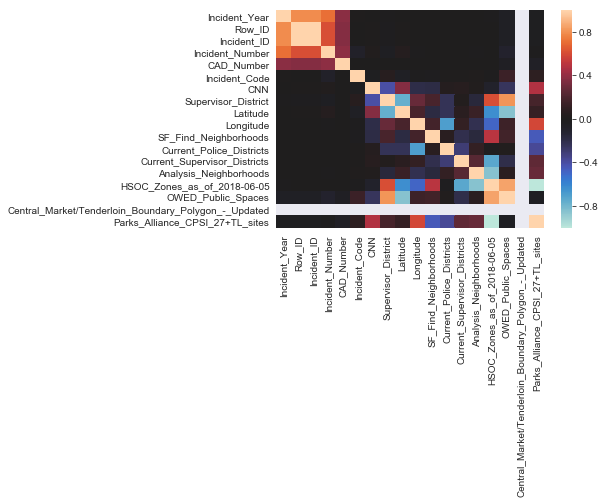

In [7]:
sns.heatmap(df.corr(),center =0)

In [8]:
df_2 = df.drop(['CAD_Number', 'Report_Type_Code', 'Filed_Online', 'Incident_Code',
       'Incident_Category', 'Incident_Subcategory', 'Intersection', 'CNN', 'Police_District',
       'Analysis_Neighborhood', 'Supervisor_District',
       'point', 'SF_Find_Neighborhoods', 'Current_Police_Districts',
       'Current_Supervisor_Districts', 'Analysis_Neighborhoods',
       'HSOC_Zones_as_of_2018-06-05', 'OWED_Public_Spaces',
       'Central_Market/Tenderloin_Boundary_Polygon_-_Updated'], axis = 1)

In [9]:
df_2.head()

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Description,Incident_Description,Resolution,Latitude,Longitude,Parks_Alliance_CPSI_27+TL_sites
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,Initial,Suspicious Occurrence,Unfounded,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,Coplogic Initial,Lost Property,Open or Active,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,Initial,Found Property,Open or Active,37.782685,-122.422464,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,Coplogic Initial,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,Initial Supplement,Found Property,Open or Active,37.779091,-122.464145,NaN


In [10]:
df_2.dropna(how='all') 

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,Report_Type_Description,Incident_Description,Resolution,Latitude,Longitude,Parks_Alliance_CPSI_27+TL_sites
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,Initial,Suspicious Occurrence,Unfounded,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,Coplogic Initial,Lost Property,Open or Active,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,Initial,Found Property,Open or Active,37.782685,-122.422464,NaN
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,Coplogic Initial,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,Initial Supplement,Found Property,Open or Active,37.779091,-122.464145,NaN
5,2019/06/10 06:57:00 PM,2019/06/10,18:57,2019,Monday,2019/06/10 06:57:00 PM,81021904134,810219,190417987,Initial,Battery,Cite or Arrest Adult,37.784449,-122.416072,NaN
6,2019/04/18 01:42:00 PM,2019/04/18,13:42,2019,Thursday,2019/04/18 01:58:00 PM,79186007045,791860,190256832,Vehicle Supplement,"Vehicle, Recovered, Truck",Open or Active,NaN,NaN,NaN
7,2019/06/10 01:30:00 AM,2019/06/10,01:30,2019,Monday,2019/06/10 02:53:00 AM,80997904134,809979,190416070,Initial,Battery,Open or Active,37.723168,-122.442554,NaN
8,2019/06/09 11:08:00 PM,2019/06/09,23:08,2019,Sunday,2019/06/10 09:28:00 PM,81026328150,810263,190418264,Initial,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,NaN
9,2019/06/03 01:15:00 PM,2019/06/03,13:15,2019,Monday,2019/06/05 05:43:00 PM,81004006374,810040,190398365,Coplogic Supplement,"Theft, Other Property, >$950",Open or Active,37.770964,-122.431904,NaN


In [11]:
df_2.shape

(223958, 15)

In [12]:
#df.Incident_Description.value_counts().plot.bar()

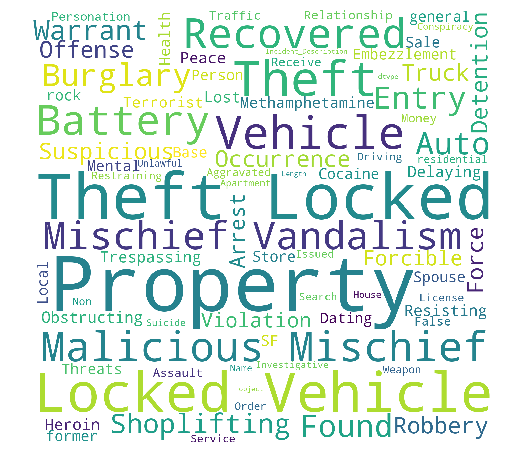

In [13]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('bmh')
wc = WordCloud(background_color = 'white', width = 1800, height = 1700).generate(str(df_2['Incident_Description']))
plt.imshow(wc)
plt.axis('off')
plt.show()

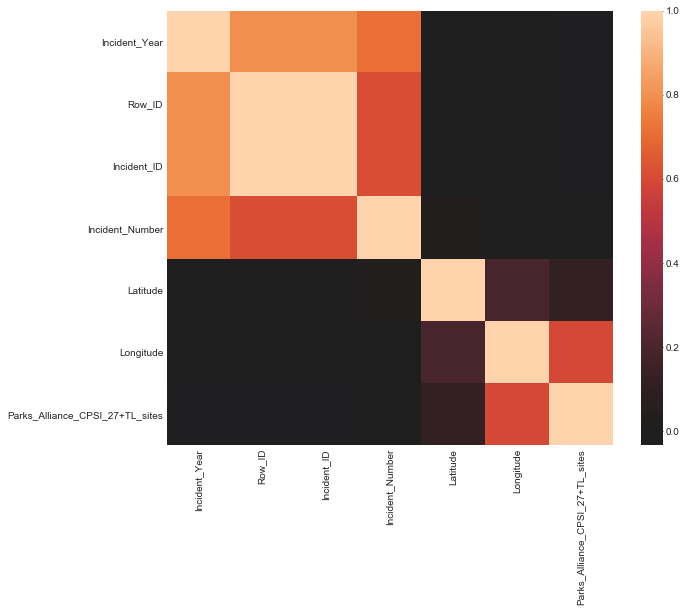

In [14]:
sns.heatmap(df_2.corr(),center =0)

In [15]:
df_2['Incident_Datetime'] = pd.to_datetime(df_2['Incident_Datetime'])

In [16]:
df_2.columns

Index(['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year',
       'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID',
       'Incident_Number', 'Report_Type_Description', 'Incident_Description',
       'Resolution', 'Latitude', 'Longitude',
       'Parks_Alliance_CPSI_27+TL_sites'],
      dtype='object')

In [17]:
df_2['date'] = df_2['Incident_Datetime'].apply(lambda t: t.date())

In [18]:
df_2['month'] = df_2['Incident_Datetime'].apply(lambda time: time.month)

In [19]:
df_2['hour'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [20]:
df_2['day'] = df_2['Incident_Datetime'].apply(lambda time: time.hour)

In [21]:
df_2.drop(['Incident_Date', 'Incident_Time', 'Incident_Year','Row_ID', 'Incident_ID', 'Report_Type_Description', 'Parks_Alliance_CPSI_27+TL_sites','Incident_Number', 'Report_Datetime','Incident_Datetime'], axis  = 1, inplace=True)



In [22]:
df_2.dropna(axis=0, inplace=True)

In [23]:
df_2.head()

,Incident_Day_of_Week,Incident_Description,Resolution,Latitude,Longitude,date,month,hour,day
2,Wednesday,Found Property,Open or Active,37.782685,-122.422464,2019-06-05,6,14,14
4,Monday,Found Property,Open or Active,37.779091,-122.464145,2019-06-10,6,11,11
5,Monday,Battery,Cite or Arrest Adult,37.784449,-122.416072,2019-06-10,6,18,18
7,Monday,Battery,Open or Active,37.723168,-122.442554,2019-06-10,6,1,1
8,Sunday,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,2019-06-09,6,23,23


## Basic Questions

** What are the top 20 crimes in San Francisco? **

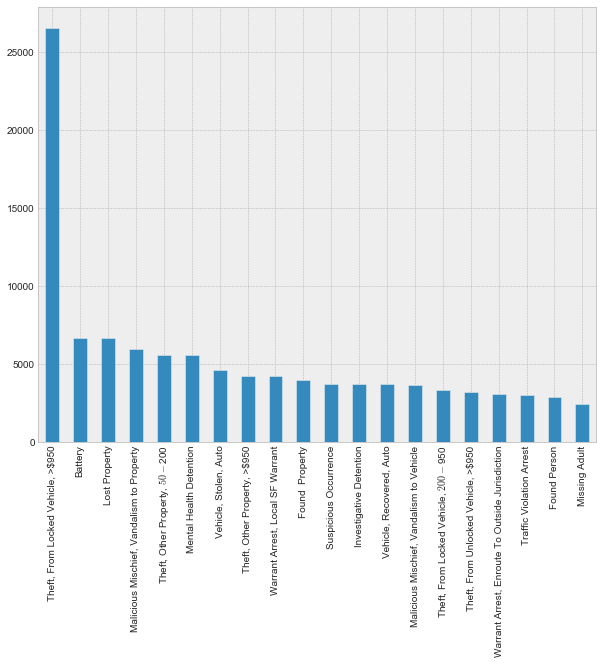

In [24]:
df_2.Incident_Description.value_counts().head(20).plot(kind='bar')

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

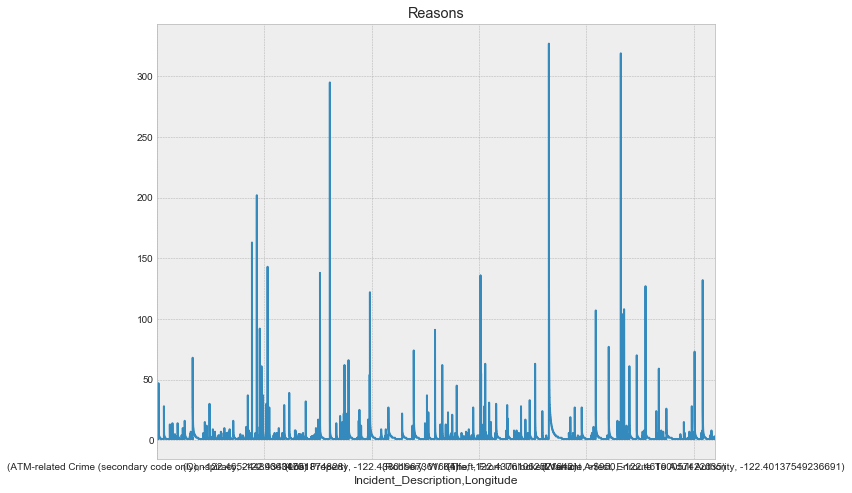

<Figure size 1440x432 with 0 Axes>

In [26]:
df_2.groupby('Incident_Description')['Longitude'].value_counts().plot()
plt.title('Reasons')
plt.figure(figsize=(20, 6))
#plt.tight_layout()

In [27]:
#sns.countplot(x='month',data=byMonth,hue='Incident_Description',palette='viridis')

In [28]:
byMonth = df_2.groupby('Incident_Day_of_Week').count()

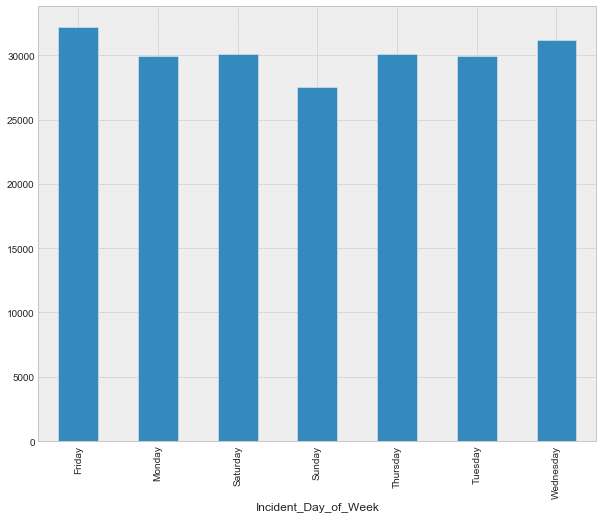

In [29]:
byMonth['Incident_Description'].plot(kind='bar')

In [30]:
dummy = pd.get_dummies(df_2[['Resolution','Incident_Day_of_Week']])

In [31]:
df_2 = pd.concat([df_2, dummy], axis=1)

In [32]:
df_2.head()

,Incident_Day_of_Week,Incident_Description,Resolution,Latitude,Longitude,date,month,hour,day,Resolution_Cite or Arrest Adult,...,Resolution_Exceptional Juvenile,Resolution_Open or Active,Resolution_Unfounded,Incident_Day_of_Week_Friday,Incident_Day_of_Week_Monday,Incident_Day_of_Week_Saturday,Incident_Day_of_Week_Sunday,Incident_Day_of_Week_Thursday,Incident_Day_of_Week_Tuesday,Incident_Day_of_Week_Wednesday
2,Wednesday,Found Property,Open or Active,37.782685,-122.422464,2019-06-05,6,14,14,0,...,0,1,0,0,0,0,0,0,0,1
4,Monday,Found Property,Open or Active,37.779091,-122.464145,2019-06-10,6,11,11,0,...,0,1,0,0,1,0,0,0,0,0
5,Monday,Battery,Cite or Arrest Adult,37.784449,-122.416072,2019-06-10,6,18,18,1,...,0,0,0,0,1,0,0,0,0,0
7,Monday,Battery,Open or Active,37.723168,-122.442554,2019-06-10,6,1,1,0,...,0,1,0,0,1,0,0,0,0,0
8,Sunday,"Malicious Mischief, Vandalism to Property",Open or Active,37.792487,-122.405654,2019-06-09,6,23,23,0,...,0,1,0,0,0,0,1,0,0,0


In [33]:
dummy_df = df_2.drop(['Incident_Day_of_Week','Resolution','Incident_Description'], axis=1)

In [34]:
dummy_df.drop('date', axis=1, inplace=True)

In [35]:
dummy_df.head()

,Latitude,Longitude,month,hour,day,Resolution_Cite or Arrest Adult,Resolution_Cite or Arrest Juvenile,Resolution_Exceptional Adult,Resolution_Exceptional Juvenile,Resolution_Open or Active,Resolution_Unfounded,Incident_Day_of_Week_Friday,Incident_Day_of_Week_Monday,Incident_Day_of_Week_Saturday,Incident_Day_of_Week_Sunday,Incident_Day_of_Week_Thursday,Incident_Day_of_Week_Tuesday,Incident_Day_of_Week_Wednesday
2,37.782685,-122.422464,6,14,14,0,0,0,0,1,0,0,0,0,0,0,0,1
4,37.779091,-122.464145,6,11,11,0,0,0,0,1,0,0,1,0,0,0,0,0
5,37.784449,-122.416072,6,18,18,1,0,0,0,0,0,0,1,0,0,0,0,0
7,37.723168,-122.442554,6,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
8,37.792487,-122.405654,6,23,23,0,0,0,0,1,0,0,0,0,1,0,0,0


In [36]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210930 entries, 2 to 223957
Data columns (total 18 columns):
Latitude                              210930 non-null float64
Longitude                             210930 non-null float64
month                                 210930 non-null int64
hour                                  210930 non-null int64
day                                   210930 non-null int64
Resolution_Cite or Arrest Adult       210930 non-null uint8
Resolution_Cite or Arrest Juvenile    210930 non-null uint8
Resolution_Exceptional Adult          210930 non-null uint8
Resolution_Exceptional Juvenile       210930 non-null uint8
Resolution_Open or Active             210930 non-null uint8
Resolution_Unfounded                  210930 non-null uint8
Incident_Day_of_Week_Friday           210930 non-null uint8
Incident_Day_of_Week_Monday           210930 non-null uint8
Incident_Day_of_Week_Saturday         210930 non-null uint8
Incident_Day_of_Week_Sunday           210930 

In [37]:
# sns.set_style('whitegrid')
# sns.lmplot('day','Resolution_Open or Active',data=df_2, hue='Longitude',
#            palette='coolwarm',size=6,aspect=1,fit_reg=False)

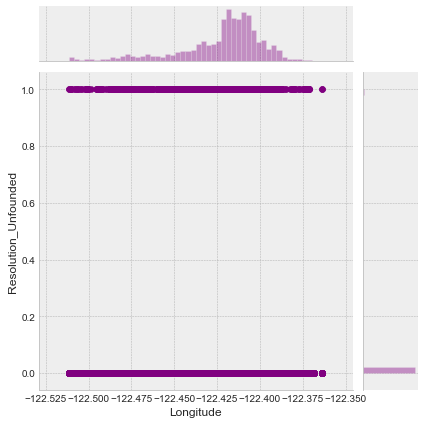

In [45]:
sns.jointplot(x='Longitude',y='Resolution_Unfounded', data=dummy_df,color='purple')

## Train Test Split 

Now its time to split our data into a training set and a testing set!
** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [39]:
X = df_2.drop('Latitude',axis=1)
y = df_2['Latitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

### Let's start by training a single decision tree first!

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'Sunday'